In [5]:
import numpy as np
mylist = [[1, 2, 3], [4, 5, 6]]
myarray = np.array(mylist)
print(myarray)
print(myarray.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [3]:
print (f'First row is : {myarray[0]}')

First row is : [1 2 3]


In [4]:
print (f'Last row is : {myarray[-1]}')

Last row is : [3 4 5]


In [7]:
print (f'Spesific row is : {myarray[0, 2]}')

Spesific row is : 3


In [8]:
print (f'Whole columns is : {myarray[:,2]}')

Whole columns is : [3 6]


In [11]:
import pandas as pd
myarray = np.array([1, 2, 3])
rownames = ['a', 'b', 'c']
myseries = pd.Series(myarray, index=rownames)

In [14]:
myseries

a    1
b    2
c    3
dtype: int64

In [18]:
print(myseries['a'], myseries[0] )
# hem index hem de row ismi ile ulasilabilir seriye

1 1


In [86]:
import csv
filename = 'pima-indians-diabetes.csv'

In [87]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [88]:
df = pd.read_csv(filename, delimiter=',', quoting=csv.QUOTE_NONE, names=names)

In [89]:
df =df.apply(lambda x : x.astype(float))

In [90]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [91]:
df.shape

(768, 9)

In [92]:
types =df.dtypes

In [93]:
print(types)

preg     float64
plas     float64
pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age      float64
class    float64
dtype: object


In [94]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [95]:
df['class'] = df['class'].map(lambda x: int(x))

In [96]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [97]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [98]:
df.groupby('class').size()

class
0    500
1    268
dtype: int64

## Correlation between Attributes

In [99]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)

In [100]:
correlations = df.corr()
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


## Skewness of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.

In [101]:
skew = df.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

## Histogram

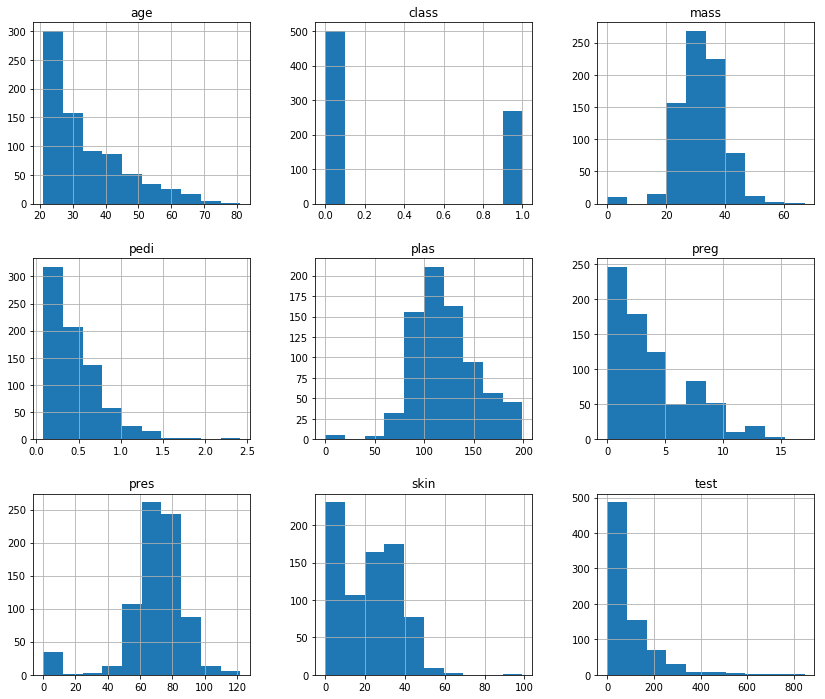

In [107]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize']=(14,12)
df.hist()
plt.show()


## Density Plots

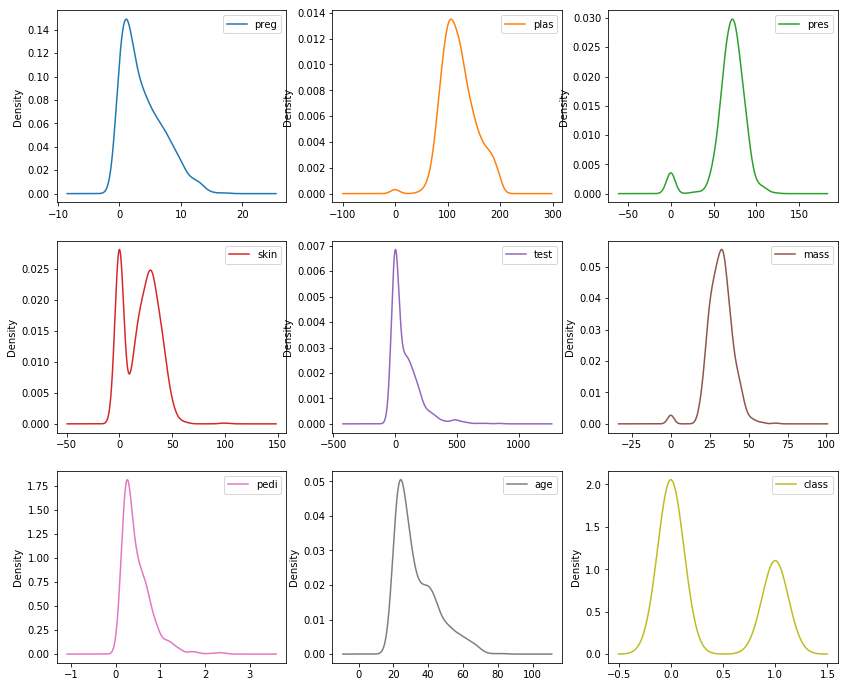

In [110]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

We can see the distribution for each attribute is clearer than the histograms.

## Box and Whisker Plots

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

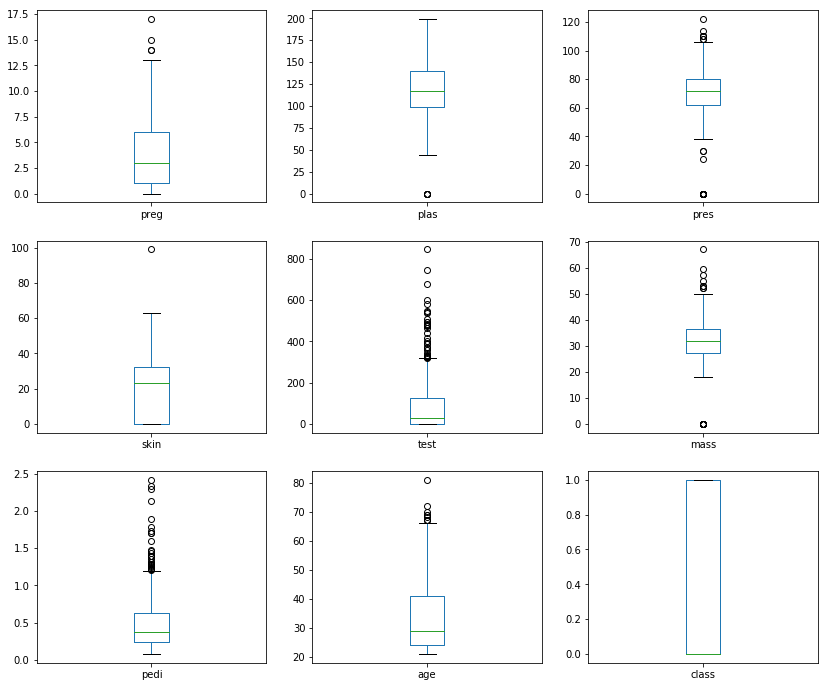

In [112]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

 If median (green line) is near to down, the sdistribution is right skewed otherwise left-skewed

## HeatMap

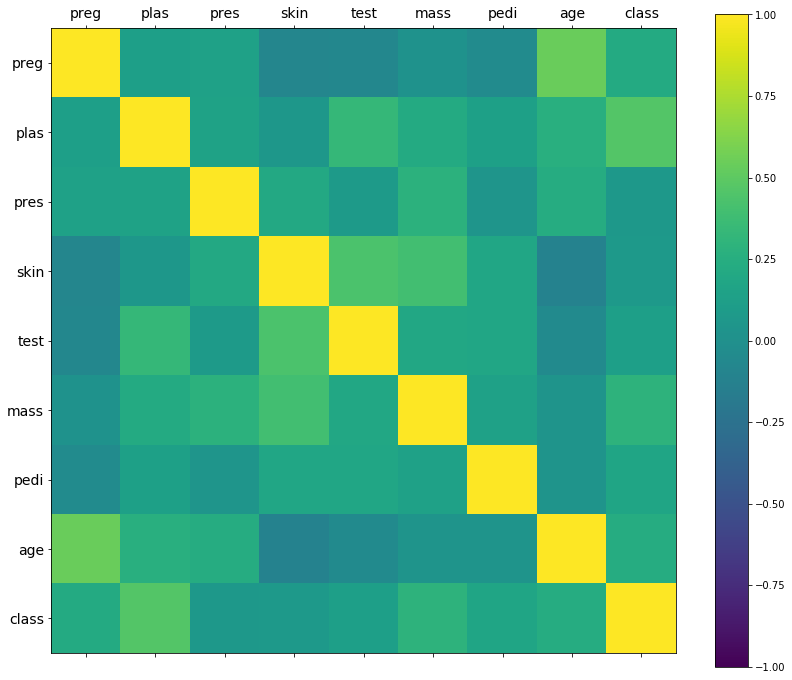

In [122]:
correlations = df.corr()
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, )
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks, )
ax.set_yticks(ticks)
ax.set_xticklabels(names, fontsize=14)
ax.set_yticklabels(names, fontsize=14)
plt.show()

## Scatterplot Matrix

/Users/serdarbozoglan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


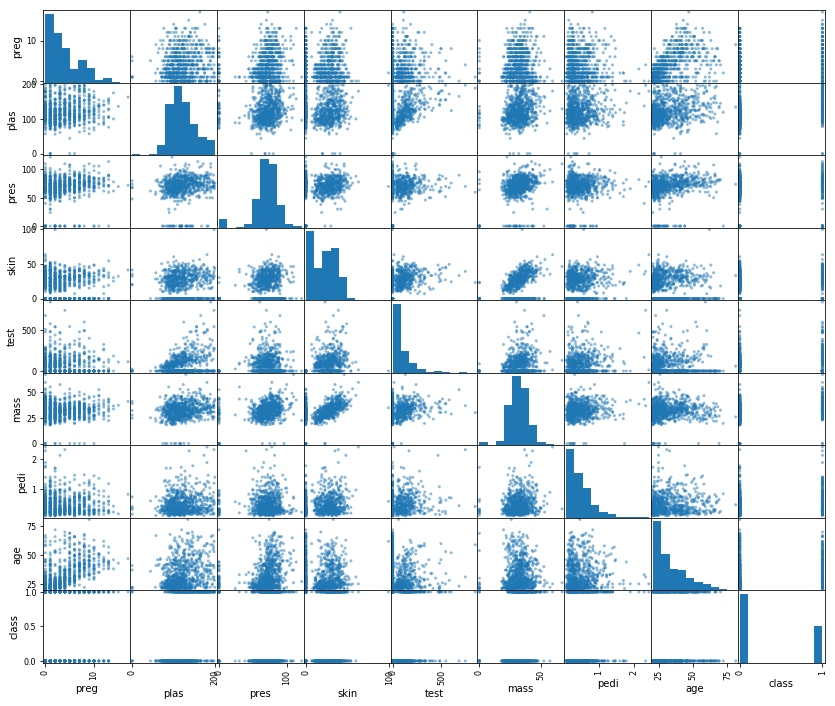

In [125]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

## Data Pre-Processing

## Rescale Data

When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. Often this is referred to as `normalization` and attributes are often rescaled into the `range between 0 and 1`. This is useful for optimization algorithms used in the core of machine learning algorithms like `gradient descent`. It is also useful for algorithms that weight inputs like `regression` and `neural networks` and algorithms that use distance measures like `k-Nearest Neighbors`. You can rescale your data using scikit-learn using the `MinMaxScaler` class2.

In [136]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

In [127]:
array = df.values

In [128]:
array

array([[   6.   ,  148.   ,   72.   , ...,    0.627,   50.   ,    1.   ],
       [   1.   ,   85.   ,   66.   , ...,    0.351,   31.   ,    0.   ],
       [   8.   ,  183.   ,   64.   , ...,    0.672,   32.   ,    1.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,    0.245,   30.   ,    0.   ],
       [   1.   ,  126.   ,   60.   , ...,    0.349,   47.   ,    1.   ],
       [   1.   ,   93.   ,   70.   , ...,    0.315,   23.   ,    0.   ]])

In [138]:
# seperate array into imput and output components

X = array[:,0:8]
y = array[:,8]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.353  0.744  0.59   0.354  0.     0.501  0.234  0.483]
 [ 0.059  0.427  0.541  0.293  0.     0.396  0.117  0.167]
 [ 0.471  0.92   0.525  0.     0.     0.347  0.254  0.183]
 [ 0.059  0.447  0.541  0.232  0.111  0.419  0.038  0.   ]
 [ 0.     0.688  0.328  0.354  0.199  0.642  0.944  0.2  ]]


## Standardization

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a `mean of 0 and a standard deviation of 1`. It is `most suitable for techniques` that assume a Gaussian distribution in the input variables and work better with rescaled data, such as `linear regression, logistic regression and linear discriminate analysis`. You can standardize data using scikit-learn with the `StandardScaler` class3.

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
array = df.values

In [144]:
X = array[:,0:8]
y = array[:,8]
scaler =StandardScaler().fit(X)
recscaledX = scaler.transform(X)
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.353  0.744  0.59   0.354  0.     0.501  0.234  0.483]
 [ 0.059  0.427  0.541  0.293  0.     0.396  0.117  0.167]
 [ 0.471  0.92   0.525  0.     0.     0.347  0.254  0.183]
 [ 0.059  0.447  0.541  0.232  0.111  0.419  0.038  0.   ]
 [ 0.     0.688  0.328  0.354  0.199  0.642  0.944  0.2  ]]


## Normalize Data

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra). This pre-processing method can be `useful for sparse datasets (lots of zeros) with attributes of varying scales` when using algorithms that weight input values such as `neural networks and algorithms that use distance measures such as k-Nearest Neighbors`. You can normalize data in Python with scikit-learn using the `Normalizer` class4.

In [148]:
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[ 0.034  0.828  0.403  0.196  0.     0.188  0.004  0.28 ]
 [ 0.008  0.716  0.556  0.244  0.     0.224  0.003  0.261]
 [ 0.04   0.924  0.323  0.     0.     0.118  0.003  0.162]
 [ 0.007  0.588  0.436  0.152  0.622  0.186  0.001  0.139]
 [ 0.     0.596  0.174  0.152  0.731  0.188  0.01   0.144]]


## Binarize Data (Make Binary)

You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0. This is called binarizing your data or thresholding your data. It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful. You can create new binary attributes in Python using scikit-learn with the Binarizer class

In [159]:
from sklearn.preprocessing import Binarizer
X = array[:,0:8]
Y = array[:,8]
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
binarizer = Binarizer(threshold=0.0).fit(X) # poxitif olanlari (0 'dan buyuk olanlari 1, digerleini 0 yapar)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]]


## Feature Selection

## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. The example below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.

In [161]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[  111.52   1411.887    17.605    53.108  2175.565   127.669     5.393
   181.304]
[[ 148.     0.    33.6   50. ]
 [  85.     0.    26.6   31. ]
 [ 183.     0.    23.3   32. ]
 [  89.    94.    28.1   21. ]
 [ 137.   168.    43.1   33. ]]
